In [2]:
import os

import numpy as np
from torch.utils.data import DataLoader
from augmentloader import AugmentLoader
from torch.optim import SGD
import cluster
import train_func as tf
from loss import MaximalCodingRateReduction
import utils
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import json

In [2]:
cpb = 10

In [71]:
def get_indices_for_label_batch(lb_batch,dt):
    res = []
    for i in range(len(dt)):
        if dt[i][1] in lb_batch:
            res.append(i)
    return res

In [3]:
transforms = tf.load_transforms('test')

In [4]:
trainset = tf.load_trainset('cifar100', transforms, path='./data/')

Files already downloaded and verified


In [5]:
trainset.num_classes

100

In [6]:
assert trainset.num_classes % cpb == 0

In [6]:
classes = np.unique(trainset.targets)

In [7]:
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
class_batch_list = classes.reshape(trainset.num_classes//cpb,cpb)

In [17]:
class_batch_list[:1,:].flatten()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.min(classes)

0

In [9]:
sub_trainset = tf.get_subset(class_batch_list[1,:].flatten(),trainset)

In [11]:
trainloader = DataLoader(sub_trainset, batch_size=200)

In [13]:
class_batch_list.shape

(10, 10)

In [21]:
a = [1,3,5]
np.mean(np.array(a))

3.0

In [72]:
train_ids = get_indices_for_label_batch(class_batch_list[0,:],trainset)

In [46]:
import torch

In [73]:
sub_trainset = torch.utils.data.Subset(trainset, train_ids)

In [77]:
trainloader = torch.utils.data.DataLoader(
                trainset,
                batch_size=10,
                drop_last=True,
                num_workers=4,
            )

In [74]:
sub_trainloader = torch.utils.data.DataLoader(
                sub_trainset,
                batch_size=100,
                drop_last=True,
                num_workers=4,
            )

In [75]:
for step, (batch_imgs, batch_lbls) in enumerate(sub_trainloader):
    print('step {}, batch {}, labels {}'.format(step,batch_imgs, batch_lbls))
    break

step 0, batch tensor([[[[0.9725, 0.9725, 0.9686,  ..., 0.0000, 0.0000, 0.0000],
          [0.9647, 0.9647, 0.9608,  ..., 0.0000, 0.0000, 0.0000],
          [0.9608, 0.9608, 0.9608,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.9490, 0.9490, 0.9451,  ..., 0.0000, 0.0000, 0.0000],
          [0.9373, 0.9373, 0.9255,  ..., 0.0000, 0.0000, 0.0000],
          [0.9333, 0.9176, 0.8941,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.8902, 0.8902, 0.8902,  ..., 0.0000, 0.0000, 0.0000],
          [0.8784, 0.8784, 0.8706,  ..., 0.0000, 0.0000, 0.0000],
          [0.8627, 0.8549, 0

In [78]:
for step, (batch_imgs, batch_lbls) in enumerate(trainloader):
    print('step {}, batch {}, labels {}'.format(step,batch_imgs, batch_lbls))
    break

step 0, batch tensor([[[[0.6157, 0.6902, 0.6157,  ..., 1.0000, 0.0000, 0.0000],
          [0.6118, 0.5725, 0.4941,  ..., 1.0000, 0.0000, 0.0000],
          [0.6941, 0.5451, 0.5490,  ..., 1.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.6431, 0.6510, 0.5294,  ..., 1.0000, 0.0000, 0.0000],
          [0.5882, 0.4235, 0.2941,  ..., 1.0000, 0.0000, 0.0000],
          [0.6353, 0.3804, 0.3294,  ..., 1.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.4627, 0.5059, 0.3882,  ..., 1.0000, 0.0000, 0.0000],
          [0.5059, 0.3059, 0.1412,  ..., 1.0000, 0.0000, 0.0000],
          [0.5843, 0.2667, 0

In [67]:
data[0].shape

torch.Size([10, 3, 32, 32])

In [2]:
mcr_acc = [0.648,0.479,0.454,0.387,0.418,0.399,0.379,0.371,0.409,0.407]
ce_acc = [0.841,0,0,0,0,0,0,0,0,0]

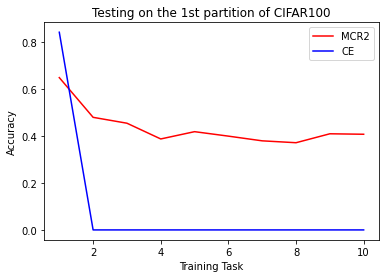

In [8]:
plt.plot(np.arange(10)+1,mcr_acc,color='r',label='MCR2')
plt.plot(np.arange(10)+1,ce_acc,color='b',label='CE')
plt.xlabel('Training Task')
plt.ylabel('Accuracy')
plt.title('Testing on the 1st partition of CIFAR100')
plt.legend()

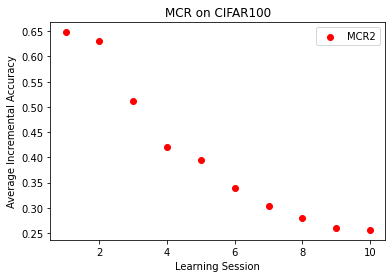

In [6]:
mcr_aia = [0.648,0.631,0.512,0.421,0.395,0.339,0.303,0.279,0.259,0.256]
plt.scatter(np.arange(10)+1,mcr_aia,color='r',label='MCR2')
plt.xlabel('Learning Session')
plt.ylabel('Average Incremental Accuracy')
plt.title('MCR on CIFAR100')
plt.legend()

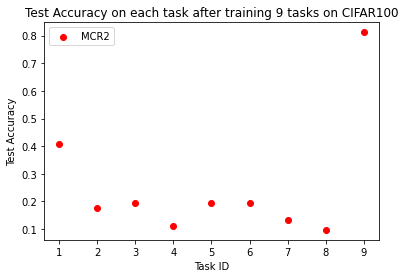

In [10]:
mcr_acc_task_9 = [0.409,0.176,0.195,0.110,0.196,0.196,0.132,0.097,0.812]
plt.scatter(np.arange(9)+1,mcr_acc_task_9,color='r',label='MCR2')
plt.xlabel('Task ID')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy on each task after training 9 tasks on CIFAR100')
plt.legend()

# Transfer Experiment

In [3]:
transfer_res = np.load("transfer_results_1.npy",allow_pickle=True)

In [7]:
dataset_list = os.listdir('/share/bharath/zw287/datasets/my_deca')

dataset_list.remove('omniglot')
dataset_list.remove('vgg-flowers')
dataset_list.remove('protein_atlas')

In [30]:
transfer_res[-2,:]

array([{'mcr_loss': -0.004144191741943359, 'nearsub_test_acc_pca': 0.0738073807380738, 'nearsub_test_acc_svd': 0.0726072607260726},
       {'mcr_loss': -0.021654844284057617, 'nearsub_test_acc_pca': 0.03382663847780132, 'nearsub_test_acc_svd': 0.03382663847780132},
       {'mcr_loss': -0.031043052673339844, 'nearsub_test_acc_pca': 0.10425531914893615, 'nearsub_test_acc_svd': 0.09680851063829787},
       {'mcr_loss': -0.0008788108825683594, 'nearsub_test_acc_pca': 0.40446111330438217, 'nearsub_test_acc_svd': 0.398736675878405},
       {'mcr_loss': -0.05695605278015137, 'nearsub_test_acc_pca': 0.40476190476190477, 'nearsub_test_acc_svd': 0.36904761904761907},
       {'mcr_loss': -0.009530305862426758, 'nearsub_test_acc_pca': 0.08071748878923768, 'nearsub_test_acc_svd': 0.07527226137091603},
       {'mcr_loss': -0.0014476776123046875, 'nearsub_test_acc_pca': 0.06120916259857301, 'nearsub_test_acc_svd': 0.0597070972587308},
       {'mcr_loss': -0.04780125617980957, 'nearsub_test_acc_pca': 

In [32]:
increase_in_error_by_mcr = []
best_expert_accs = []
for target_ds_id in range(len(dataset_list)):
    if target_ds_id==12:
        continue
    target_ds = dataset_list[target_ds_id]
    expert_accs = [] 
    mcr_losses = []
    print("Target dataset: {}".format(target_ds))
    for source_ds_id in range(len(dataset_list)):
        if source_ds_id == target_ds_id:
            continue
        if target_ds_id==12:
            continue
        source_ds = dataset_list[source_ds_id]
        res = transfer_res[source_ds_id,target_ds_id]
        mcr_loss,acc_pca,acc_svd = res['mcr_loss'],res['nearsub_test_acc_pca'],res['nearsub_test_acc_svd']
        mcr_losses.append(mcr_loss)
        expert_accs.append(acc_pca)
        
    smallest_mcr_loss_id = np.argmin(np.array(mcr_losses))
    predicted_best_acc = expert_accs[smallest_mcr_loss_id]
    actual_best_acc = max(np.array(expert_accs))
    print(actual_best_acc)
    print(predicted_best_acc)
    increase_in_error = actual_best_acc-predicted_best_acc
    
    print("The best predicted accuracy is: {}".format(predicted_best_acc))
    print("The best actual accuracy is: {}".format(actual_best_acc))
    increase_in_error_by_mcr.append(increase_in_error)
    best_expert_accs.append(actual_best_acc)

Target dataset: aircraft
0.0738073807380738
0.0651065106510651
The best predicted accuracy is: 0.0651065106510651
The best actual accuracy is: 0.0738073807380738
Target dataset: cub
0.059196617336152224
0.05877378435517966
The best predicted accuracy is: 0.05877378435517966
The best actual accuracy is: 0.059196617336152224
Target dataset: dtd
0.13191489361702124
0.10319148936170208
The best predicted accuracy is: 0.10319148936170208
The best actual accuracy is: 0.13191489361702124
Target dataset: isic
0.41255428345834977
0.3578760363205685
The best predicted accuracy is: 0.3578760363205685
The best actual accuracy is: 0.41255428345834977
Target dataset: merced
0.5047619047619047
0.40476190476190477
The best predicted accuracy is: 0.40476190476190477
The best actual accuracy is: 0.5047619047619047
Target dataset: scenes
0.09256886611146697
0.07847533632286996
The best predicted accuracy is: 0.07847533632286996
The best actual accuracy is: 0.09256886611146697
Target dataset: ucf101
0.076

In [41]:
random_select_accs = []
for target_ds_id in range(len(dataset_list)):
    if target_ds_id==12:
        continue
    target_ds = dataset_list[target_ds_id]
    expert_accs = [] 
    
    print("Target dataset: {}".format(target_ds))
    for source_ds_id in range(len(dataset_list)):
        if source_ds_id == target_ds_id:
            continue
        if target_ds_id==12:
            continue
        source_ds = dataset_list[source_ds_id]
        res = transfer_res[source_ds_id,target_ds_id]
        mcr_loss,acc_pca,acc_svd = res['mcr_loss'],res['nearsub_test_acc_pca'],res['nearsub_test_acc_svd']
        expert_accs.append(acc_pca)

    selected_expert_id = np.random.randint(0,len(dataset_list)-2)
    random_select_accs.append(expert_accs[selected_expert_id])

Target dataset: aircraft
Target dataset: cub
Target dataset: dtd
Target dataset: isic
Target dataset: merced
Target dataset: scenes
Target dataset: ucf101
Target dataset: cifar100
Target dataset: daimlerpedcls
Target dataset: gtsrb
Target dataset: kather
Target dataset: svhn
Target dataset: minc


In [34]:
np.mean(np.array(increase_in_error_by_mcr))

0.05078271918545882

In [35]:
np.mean(1-np.array(best_expert_accs))

0.6350036872235661

In [42]:
np.mean(np.array(best_expert_accs)-np.array(random_select_accs))

0.09330198510949354

# T-SNE Plot

In [2]:
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
cpb = 10
model_dir = "saved_models/seqsup_resnet18+128_cifar100_cpb10_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam11.0_gam21.0_eps0.5_lcr0.0"
params = utils.load_params(model_dir)
train_transforms = tf.load_transforms('test')
trainset = tf.load_trainset(params['data'], train_transforms, train=True)
test_transforms = tf.load_transforms('test')
testset = tf.load_trainset(params['data'], test_transforms, train=False)
assert (trainset.num_classes % cpb == 0),"Number of classes not divisible by cpb"
classes = np.unique(trainset.targets)
class_batch_num = trainset.num_classes//cpb

Files already downloaded and verified
Files already downloaded and verified


In [4]:
class_batch_list = classes.reshape(class_batch_num,cpb)

In [17]:
net_0, epoch = tf.load_checkpoint(model_dir, None, eval_=True, label_batch_id=0)
net_1, epoch = tf.load_checkpoint(model_dir, None, eval_=True, label_batch_id=1)
net_2, epoch = tf.load_checkpoint(model_dir, None, eval_=True, label_batch_id=2)
net_3, epoch = tf.load_checkpoint(model_dir, None, eval_=True, label_batch_id=3)
net_4, epoch = tf.load_checkpoint(model_dir, None, eval_=True, label_batch_id=4)
net_5, epoch = tf.load_checkpoint(model_dir, None, eval_=True, label_batch_id=5)

Loading checkpoint: saved_models/seqsup_resnet18+128_cifar100_cpb10_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam11.0_gam21.0_eps0.5_lcr0.0/checkpoints/labelbatch0/model-epoch199.pt
Loading checkpoint: saved_models/seqsup_resnet18+128_cifar100_cpb10_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam11.0_gam21.0_eps0.5_lcr0.0/checkpoints/labelbatch1/model-epoch199.pt
Loading checkpoint: saved_models/seqsup_resnet18+128_cifar100_cpb10_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam11.0_gam21.0_eps0.5_lcr0.0/checkpoints/labelbatch2/model-epoch199.pt
Loading checkpoint: saved_models/seqsup_resnet18+128_cifar100_cpb10_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam11.0_gam21.0_eps0.5_lcr0.0/checkpoints/labelbatch3/model-epoch199.pt
Loading checkpoint: saved_models/seqsup_resnet18+128_cifar100_cpb10_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam11.0_gam21.0_eps0.5_lcr0.0/checkpoints/labelbatch4/model-epoch199.pt
Loading checkpoint: saved_models/seqsup_resnet18+128_cifar100_cpb10_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam1

In [6]:
class_batch_list[0,:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
subtrainset = tf.get_subset([0,1,2],trainset)
# subtrainset = tf.get_subset(class_batch_list[task_id,:],trainset)
# print("subset train size: {}".format(len(subtrainset)))
trainloader = DataLoader(subtrainset, batch_size=200)
train_features, train_labels = tf.get_features(net_4, trainloader)

features_embedded = TSNE(n_components=2).fit_transform(train_features.numpy())

extracting all features from dataset: 100%|██████████| 8/8 [00:00<00:00, 24.03it/s]


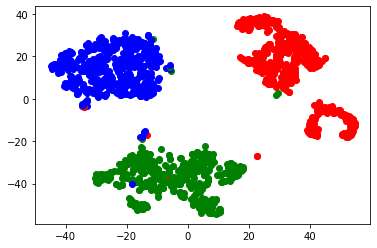

In [12]:
myCmap = np.array(['r', 'g', 'b'])
for j in range(features_embedded.shape[0]):
    label=train_labels[j]
    plt.scatter(features_embedded[j, 0], features_embedded[j, 1],color=myCmap[label],label=label)

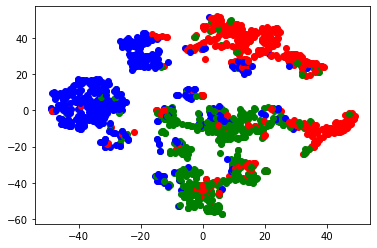

In [14]:
myCmap = np.array(['r', 'g', 'b'])
for j in range(features_embedded.shape[0]):
    label=train_labels[j]
    plt.scatter(features_embedded[j, 0], features_embedded[j, 1],color=myCmap[label],label=label)

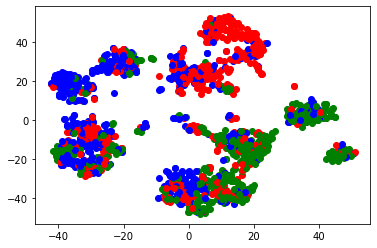

In [19]:
myCmap = np.array(['r', 'g', 'b'])
for j in range(features_embedded.shape[0]):
    label=train_labels[j]
    plt.scatter(features_embedded[j, 0], features_embedded[j, 1],color=myCmap[label],label=label)

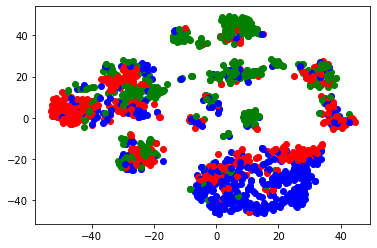

In [21]:
myCmap = np.array(['r', 'g', 'b'])
for j in range(features_embedded.shape[0]):
    label=train_labels[j]
    plt.scatter(features_embedded[j, 0], features_embedded[j, 1],color=myCmap[label],label=label)

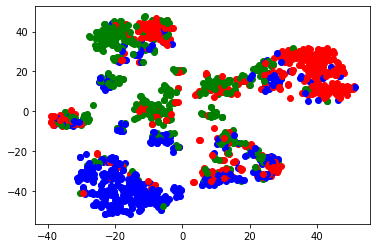

In [23]:
myCmap = np.array(['r', 'g', 'b'])
for j in range(features_embedded.shape[0]):
    label=train_labels[j]
    plt.scatter(features_embedded[j, 0], features_embedded[j, 1],color=myCmap[label],label=label)

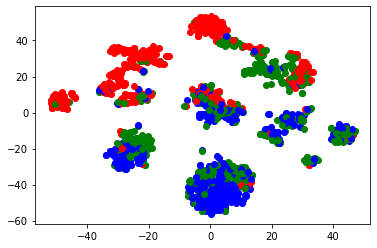

In [16]:
myCmap = np.array(['r', 'g', 'b'])
for j in range(features_embedded.shape[0]):
    label=train_labels[j]
    plt.scatter(features_embedded[j, 0], features_embedded[j, 1],color=myCmap[label],label=label)

# Finetuneing Experiments

In [ ]:
res_exp_only = np.load("fintune_result_aircraft_expandonly.npy")
res_full_term = np.load("fintune_result_aircraft_fullterm.npy")

In [ ]:
res_exp_only.item()

In [ ]:
res_full_term.item()

In [2]:
#sketch
model_dir = 'saved_models/experts/mcr2/sup_expert_resnet18+128_aircraft_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam11.0_gam21.0_eps0.5_lcr0.0'
net, _ = tf.load_checkpoint(model_dir, None)

Loading checkpoint: saved_models/experts/mcr2/sup_expert_resnet18+128_aircraft_epo200_bs1000_lr0.001_mom0.9_wd0.0005_gam11.0_gam21.0_eps0.5_lcr0.0/checkpoints/model-epoch199.pt


In [14]:
# for name, m in net.named_modules():
#     print(name)
#     if isinstance(m, nn.Conv2d):
#         print(name)
#         print(m.weight.data)
#         break

In [16]:
len(list(net.parameters()))

65

# Residual Adapter

In [4]:
import architectures.resnet_resadpt as resadpt
from architectures.resnet_cifar import ResNet18

In [6]:
n1 = resadpt.resnet18(10)
n2 = ResNet18()

In [9]:
for name, m in n1.named_modules():
    if isinstance(m, nn.Conv2d) and (m.kernel_size[0]==3):
        print(name)

conv1.conv
layer1.0.conv1.conv
layer1.0.conv2.1.conv
layer1.1.conv1.conv
layer1.1.conv2.1.conv
layer2.0.conv1.conv
layer2.0.conv2.1.conv
layer2.1.conv1.conv
layer2.1.conv2.1.conv
layer3.0.conv1.conv
layer3.0.conv2.1.conv
layer3.1.conv1.conv
layer3.1.conv2.1.conv
layer4.0.conv1.conv
layer4.0.conv2.1.conv
layer4.1.conv1.conv
layer4.1.conv2.1.conv


In [10]:
for name, m in n2.named_modules():
    if isinstance(m, nn.Conv2d) and (m.kernel_size[0]==3):
        print(name)

conv1
layer1.0.conv1
layer1.0.conv2
layer1.1.conv1
layer1.1.conv2
layer2.0.conv1
layer2.0.conv2
layer2.1.conv1
layer2.1.conv2
layer3.0.conv1
layer3.0.conv2
layer3.1.conv1
layer3.1.conv2
layer4.0.conv1
layer4.0.conv2
layer4.1.conv1
layer4.1.conv2


In [11]:
for name, m in n1.named_modules():
    if isinstance(m, nn.BatchNorm2d) and 'bns.' in name:
        print(name)

conv1.bns.0
layer1.0.conv1.bns.0
layer1.0.conv2.1.bns.0
layer1.1.conv1.bns.0
layer1.1.conv2.1.bns.0
layer2.0.conv1.bns.0
layer2.0.conv2.1.bns.0
layer2.1.conv1.bns.0
layer2.1.conv2.1.bns.0
layer3.0.conv1.bns.0
layer3.0.conv2.1.bns.0
layer3.1.conv1.bns.0
layer3.1.conv2.1.bns.0
layer4.0.conv1.bns.0
layer4.0.conv2.1.bns.0
layer4.1.conv1.bns.0
layer4.1.conv2.1.bns.0
end_bns.0.0


In [14]:
for name, m in n2.named_modules():
    if isinstance(m, nn.BatchNorm2d) and 'bn' in name:
        print(name)

bn1
layer1.0.bn1
layer1.0.bn2
layer1.1.bn1
layer1.1.bn2
layer2.0.bn1
layer2.0.bn2
layer2.1.bn1
layer2.1.bn2
layer3.0.bn1
layer3.0.bn2
layer3.1.bn1
layer3.1.bn2
layer4.0.bn1
layer4.0.bn2
layer4.1.bn1
layer4.1.bn2


In [16]:
list(n2.named_modules())

[('',
  ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2

In [17]:
import re
condition_bn = 'noproblem'
for id_task in range(len([10])):
    element = 0
    for name, m in n1.named_modules():
        if isinstance(m, nn.BatchNorm2d) and 'bns.'+str(id_task) in name and not re.search(condition_bn,name):
            print(name)
            element += 1

conv1.bns.0
layer1.0.conv1.bns.0
layer1.0.conv2.1.bns.0
layer1.1.conv1.bns.0
layer1.1.conv2.1.bns.0
layer2.0.conv1.bns.0
layer2.0.conv2.1.bns.0
layer2.1.conv1.bns.0
layer2.1.conv2.1.bns.0
layer3.0.conv1.bns.0
layer3.0.conv2.1.bns.0
layer3.1.conv1.bns.0
layer3.1.conv2.1.bns.0
layer4.0.conv1.bns.0
layer4.0.conv2.1.bns.0
layer4.1.conv1.bns.0
layer4.1.conv2.1.bns.0


In [21]:
list(n2.named_modules())[1][0]

'conv1'